# **IMAGE RECOGNITION SYSTEM USING CNN ON CIFAR-10 DATA SET**

Importing libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the data set

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

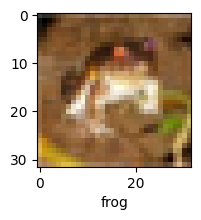

In [11]:
plot_sample(X_train, y_train, 0)

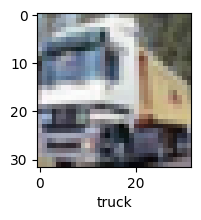

In [12]:
plot_sample(X_train, y_train, 1)

Normalizing the training data (Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Now let us build a convolutional neural network to train our images

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.4994 - accuracy: 0.4604
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1444 - accuracy: 0.5971
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0164 - accuracy: 0.6463
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9306 - accuracy: 0.6753
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8704 - accuracy: 0.6979
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8130 - accuracy: 0.7183
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7684 - accuracy: 0.7336
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7307 - accuracy: 0.7464
Epoch 9/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.6956 - accuracy: 0.7571
Epoch 10/10
1563/1563 [==============================] - 73s 47m

In this CNN, accuracy is at around 70%

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9087 - accuracy: 0.7003


[0.9087201952934265, 0.7002999782562256]

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

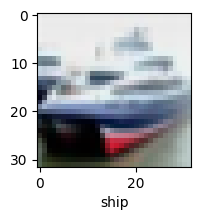

In [22]:
plot_sample(X_test, y_test,1)

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[1.3318707e-03, 1.1546321e-03, 4.5324536e-03, 8.2090378e-01,
        2.9691198e-04, 1.2777641e-01, 2.1072442e-02, 1.3242885e-04,
        2.0956045e-02, 1.8429583e-03],
       [3.6341220e-03, 5.8601242e-01, 4.3941101e-05, 3.4569649e-07,
        1.2371140e-07, 1.4293067e-07, 3.6111470e-07, 4.5375816e-07,
        3.8820145e-01, 2.2106787e-02],
       [3.1146703e-02, 1.9520068e-01, 2.8808668e-04, 9.1682683e-04,
        2.5839099e-05, 4.4204244e-05, 1.2865807e-04, 1.9737627e-04,
        7.3421276e-01, 3.7838988e-02],
       [8.2899451e-01, 2.3266438e-03, 1.3683309e-02, 4.9785938e-04,
        2.7339435e-03, 2.2990309e-05, 1.2175811e-02, 4.0870644e-05,
        1.3951279e-01, 1.1331415e-05],
       [5.1400707e-06, 1.5454920e-05, 1.8679790e-01, 6.9031201e-02,
        4.3852571e-01, 1.2507931e-02, 2.9289830e-01, 6.7600951e-05,
        1.4843282e-04, 2.3431467e-06]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

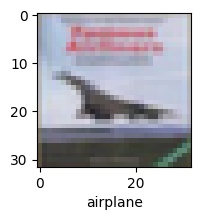

In [26]:
plot_sample(X_test, y_test,3)

In [27]:
classes[y_classes[3]]

'airplane'

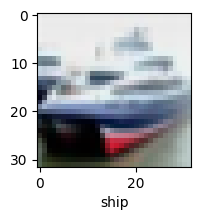

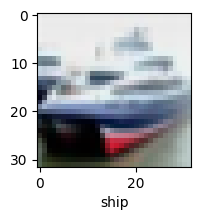

In [29]:
plot_sample(X_test, y_test,1)

In [30]:
classes[y_classes[1]]

'automobile'

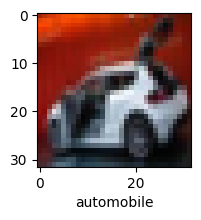

In [31]:
plot_sample(X_test, y_test,6)

In [32]:
classes[y_classes[6]]

'automobile'

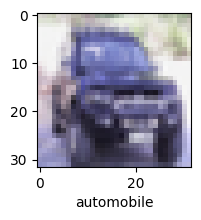

In [33]:
plot_sample(X_test, y_test,9)

In [34]:
classes[y_classes[9]]

'automobile'

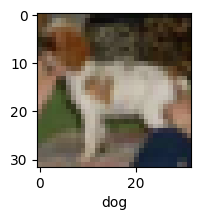

In [47]:
plot_sample(X_test, y_test,12)

In [46]:
classes[y_classes[12]]

'dog'

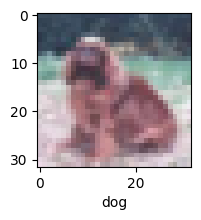

In [62]:
plot_sample(X_test, y_test,101)

In [63]:
classes[y_classes[101]]

'horse'

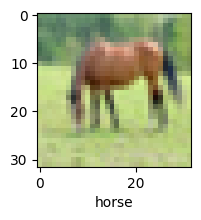

In [54]:
plot_sample(X_test, y_test,60)

In [55]:
classes[y_classes[60]]

'horse'

THE ACCURACY OF THIS SYSTEM IS 70%